# Prática independente - Visualização.

<br>
<img src="house_price.png" width="950" />
<br>


#### Vamos investigar um dataset com preços de casas em [King County](https://en.wikipedia.org/wiki/King_County,_Washington) EUA.

#### Features:
- **price** - The last price the house was sold for
- **num_bed** - The number of bedrooms
- **num_bath** - The number of bathrooms (fractions mean the house has a toilet-only or shower/bathtub-only bathroom)
- **size_house** (includes basement) - The size of the house
- **size_lot** - The size of the lot
- **num_floors** - The number of floors
- **is_waterfront** - Whether or not the house is a waterfront house (0 means it is not a waterfront house whereas 1 means that it is a waterfront house)
- **condition** - How worn out the house is. Ranges from 1 (needs repairs all over the place) to 5 (the house is very well maintained)
- **size_basement** - The size of the basement
- **year_built** - The year the house was built
- **renovation_date** - The year the house was renovated for the last time. 0 means the house has never been renovated
- **zip** - The zip code
- **latitude** - Latitude
- **longitude** - Longitude
- **avg_size_neighbor_houses** - The average house size of the neighbors
- **avg_size_neighbor_lot** - The average lot size of the neighbors

#### Importamos os pacotes necessários:

In [ ]:
# Pacotes numéricos e estatísticos
import numpy as np
import scipy.stats as stats

# Pandas gerencia o carregamento e a manipulação do dataset
import pandas as pd

# Funções de plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar matplotlib para que seja mostrado no notebook (sem necessidade de usar plt.show())
%matplotlib inline

#### Exercício 1: Carregamos os dados com o pandas.

In [ ]:
dados= pd.read_csv('kc_house_data.csv')

#### verifique a forma com o atributo `.shape` e estude as primeiras linhas do dataset com o atributo `head()`.

In [ ]:
dados.shape

(21613, 21)

In [ ]:
print(f'Instâncias {dados.shape[0]}')
print(f'Variáveis {dados.shape[1]}')

Instâncias 21613
Variáveis 21


In [ ]:
dados.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


#### Imprima a lista de nomes das colunas.

In [ ]:
dados.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

#### Use o comando .info() para caracterizar os dados do dataframe.

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

#### Exercício - 2: Descreva brevemente o dataset.

#### Que informação ele contém? 

#### Quantos casos? 

#### Que tipo de dados possui?



Os dados contém informações de diversas características sobre casas situadas na cidade de King County (no estado de Washington) nos EUA.

Ao todo, ainda sem analisar se há dados duplicados, temos informações de 21613 casas.

A grande maioria dos dados são de tipo float e int, tendo somente a coluna das datas em object. Elas não estão muito claras, mas o que os números iniciais das instâncias com essa variável indicam é que ela diz respeito à data em que a casa foi registrada no dataset. A coluna de `year_built`, que é o ano de construção das casas e os anos recentes da coluna `date` me levam a essa hipótese do significado desta. 

####Há dados duplicados?

In [ ]:
dados.duplicated().sum()

0

#### Construa arranjos numpy para `price` e `yr_built`.

In [ ]:
arranjo_price = dados['price'].to_numpy()

arranjo_year_built = dados['yr_built'].to_numpy()

#### Impríma-os na tela.

In [ ]:
print(f'Arranjo price: {arranjo_price}')
print(f'Arranjo year built: {arranjo_year_built}')

Arranjo price: [221900. 538000. 180000. ... 402101. 400000. 325000.]
Arranjo year built: [1955 1951 1933 ... 2009 2004 2008]


#### Estude a função `plt.plot()` e plote os arranjos numpy para `yr_built` vs `price`.

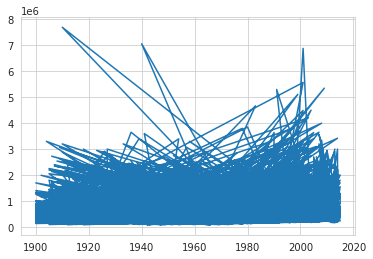

In [41]:
plt.plot(arranjo_year_built, arranjo_price);

* Você considera o tamanho da imagem adequado? E o tipo ou a cor do marcador?
* Lembre-se que colocar *;* no final da sentença fará com que apenas a imagem seja mostrada

A imagem está um pouco pequena e com informação confusa com o marcador de linha.

#### Estude a função `plt.figure()` e plote novamente os arranjos numpy para `yr_built` vs `price`.

O argumento 'bo' deixar o marcador do plot como bolas azuis. O marcador padrão é linha.

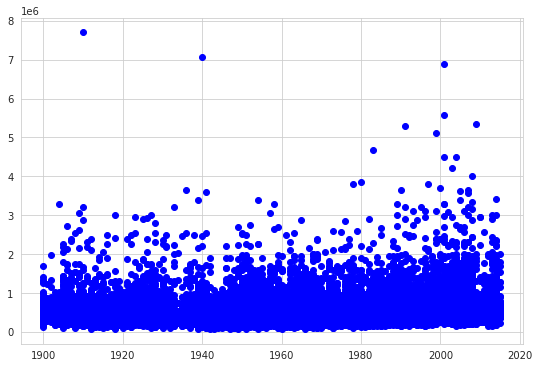

In [43]:
plt.figure(figsize=(9, 6))

plt.plot(arranjo_year_built, arranjo_price, 'bo');

#### Explore opções `plt.xlabel()` e `plt.ylabel()` de legendas e `plt.title()` de título. e replote a mesma figura.

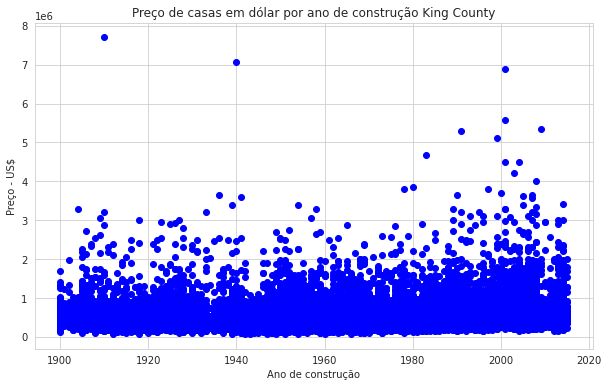

In [44]:
plt.figure(figsize=(10, 6))

#Texto eixo x
plt.xlabel('Ano de construção')

#Texto eixo y
plt.ylabel('Preço - US$')

#Título
plt.title('Preço de casas em dólar por ano de construção King County')

plt.plot(arranjo_year_built, arranjo_price, 'bo');

#### Observe as alternativas com o comando `sns.jointplot()`.

A função [`jointplot`](http://seaborn.pydata.org/generated/seaborn.jointplot.html) além da relação entre as duas variáveis me retorna a distribuição delas separadamente no eixo correspondente na figura.

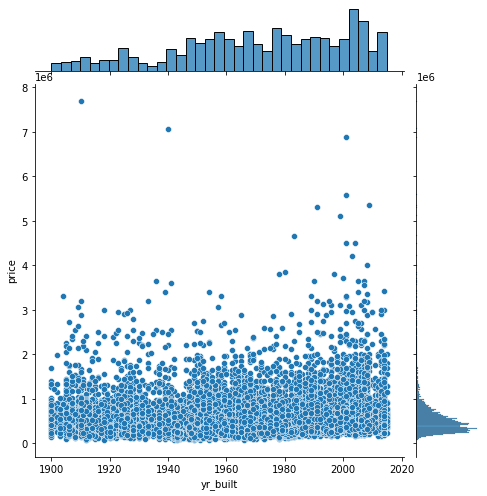

In [ ]:
sns.jointplot(data=dados, x='yr_built', y='price', height=7);

#### Construa arranjos numpy para `sqft_living` e `bedrooms`.

In [ ]:
arranjo_sqft_living = dados['sqft_living'].to_numpy()
arranjo_bedrooms = dados['bedrooms'].to_numpy()

#### Estude a relação `sqft_living` vs `Price` e faça a plotagem das duas variáveis com seus respectivos histogramas.

`sqfr_living` = área total da casa

`price` = preço

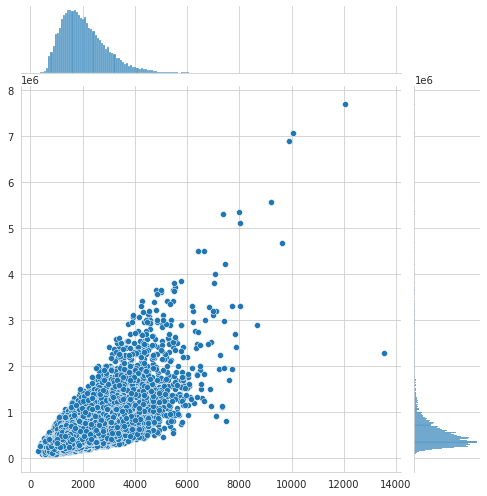

In [ ]:
sns.set_style("whitegrid")

sns.jointplot(x= arranjo_sqft_living, y= arranjo_price, height=7);

In [ ]:
# Correlação linear entre as duas variáveis de 0.70
np.corrcoef(arranjo_sqft_living, arranjo_price)

array([[1.        , 0.70203505],
       [0.70203505, 1.        ]])

Temos um comportamento de correlação linear entre as duas variáveis. A medida que o tamanho da casa cresce o seu preço também. Tendo em vista a natureza das duas variáveis, este comportamento parece fazer sentido. 

#### Vejamos do que se trata o `sns.pairplot()` do seaborn.

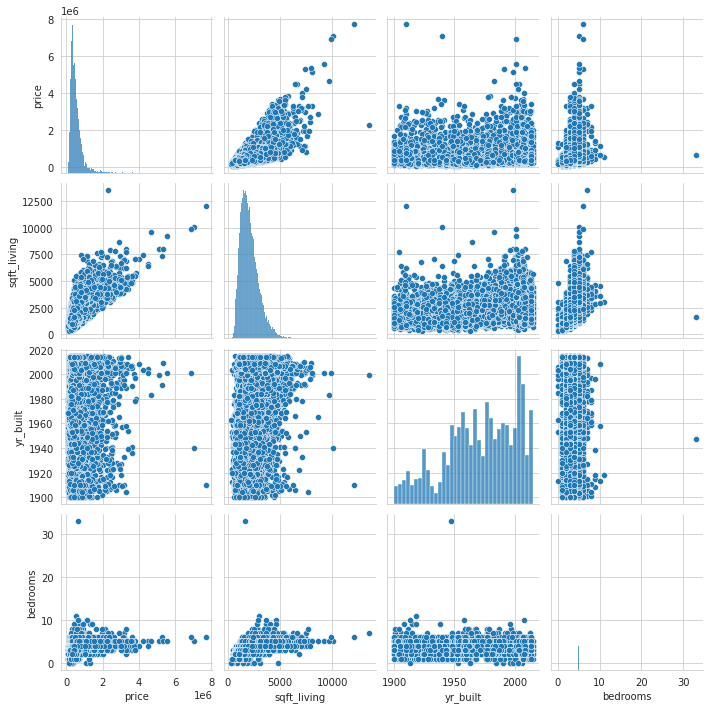

In [ ]:
sns.pairplot(dados[['price', 'sqft_living', 'yr_built', 'bedrooms']]);

A função [`.pairplot()`](https://seaborn.pydata.org/generated/seaborn.pairplot.html) me permite visualizar as correlações entre diversas variáveis ao mesmo tempo.


#### Crie um subconjunto do dataframe "houses", selecionando apenas as colunas `price`, `bedrooms`, `bathrooms`, `sqft_living`, `sqft_lot` , `floors`.


In [ ]:
dados2= dados[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors']]
dados2.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors
0,221900.0,3,1.00,1180,5650,1.0
1,538000.0,3,2.25,2570,7242,2.0
2,180000.0,2,1.00,770,10000,1.0
3,604000.0,4,3.00,1960,5000,1.0
4,510000.0,3,2.00,1680,8080,1.0


#### Aplique a função `pairplot()` para criar um gráfico com as colunas do subconjunto criado acima.

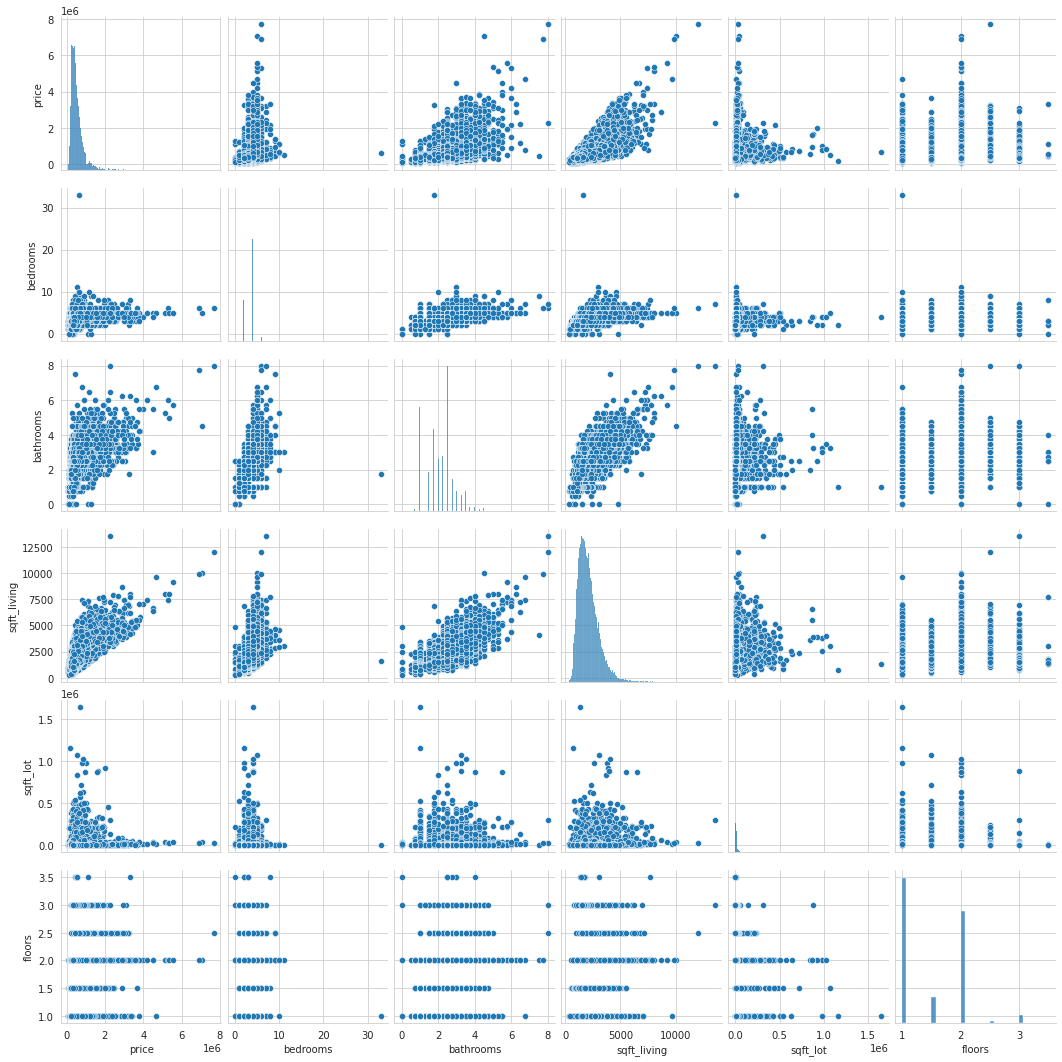

In [ ]:
sns.pairplot(dados2);

#### Estude a função `sns.boxplot`.

Comparação da distribuição de quartos de dormir, banheiros e andares

Text(0.5, 1.0, 'Distribuição de quartos de dormir, banheiros e andares - King County (USA)')

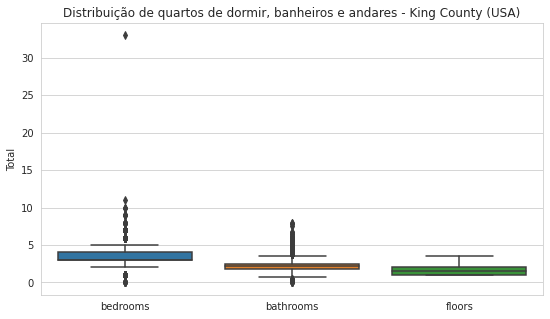

In [ ]:
plt.figure(figsize=(9, 5))

sns.boxplot(data=dados2[['bedrooms', 'bathrooms', 'floors']]);

#Texto eixo y
plt.ylabel('Total')

#Título
plt.title('Distribuição de quartos de dormir, banheiros e andares - King County (USA)')

#### Box plots: Analise a distribuição da variável `price`, de acordo com o número de quartos `bedrooms` e componha o boxplot da relação.

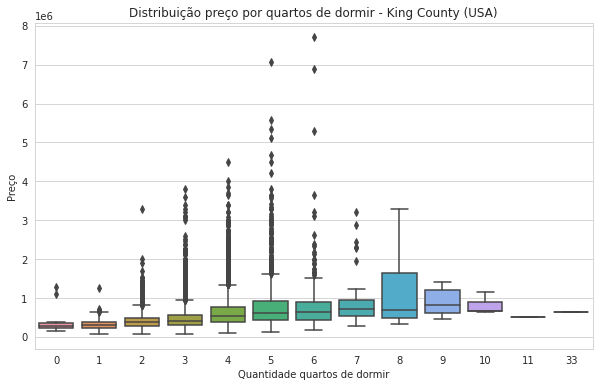

In [45]:
plt.figure(figsize=(10, 6))

sns.boxplot(data= dados2, x= 'bedrooms', y= 'price')

#Texto eixo x
plt.xlabel('Quantidade quartos de dormir')

#Texto eixo y
plt.ylabel('Preço')

#Título
plt.title('Distribuição preço por quartos de dormir - King County (USA)');

#### De modo análogo, analise a distribuição da variável `floors`, segundo o preço `price`.

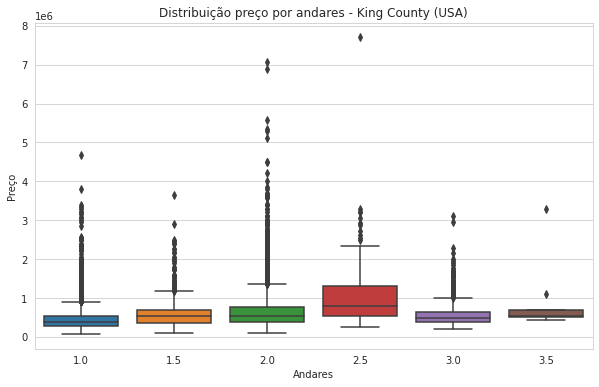

In [ ]:
plt.figure(figsize=(10, 6))

sns.boxplot(data= dados2, x= 'floors', y= 'price');


#Texto eixo x
plt.xlabel('Andares')

#Texto eixo y
plt.ylabel('Preço')

#Título
plt.title('Distribuição preço por andares - King County (USA)');

#### O que você pode dizer sobre os dois `boxplots`?

`Preço x quartos de dormir`:

É possível perceber o movimento crescente de preço conforme o aumento do número de quartos que a casa possui.

`Preço x andares`:

É possível perceber um movimento crescente mais leve na relação entre preços e número de andares da casa.

`Hipótese`:

O número de quartos de dormir influencia mais a determinação do valor da casa do que o número de andares.

`Questão`:

Uma questão que surge é por que há casas com andares definidos como 1.5, 2.5 e 3.5? 

####Analisando correlação linear entre as 3 variáveis (preço, quartos de dormir e andares)

In [ ]:
dados2[['price', 'bedrooms', 'floors']].corr()

,price,bedrooms,floors
price,1.000000,0.308350,0.256794
bedrooms,0.308350,1.000000,0.175429
floors,0.256794,0.175429,1.000000


Apesar de a correlação linear demonstrar diferença de fato entre `preços/quartos` e `preços/andares`, a diferença não é tão significativa.

####Relação entre qualidade da manutenção da casa (1 até 5, sendo 5 boa manutenção e 1 o inverso) com as casas com valores de até 900000 (novecentos mil) dólares

In [46]:
# Gerando dataframe com casas de até 900 mil dólares
casas_ate_900mil = dados[dados['price'] <= 900000]

In [47]:
# Conferindo se só as casas até 900 mil estão no dataframe gerado consultando seu valor máximo na coluna 'price'
casas_ate_900mil['price'].max()

900000.0

Boxplot da relação preço das casas e qualidade da manutenção

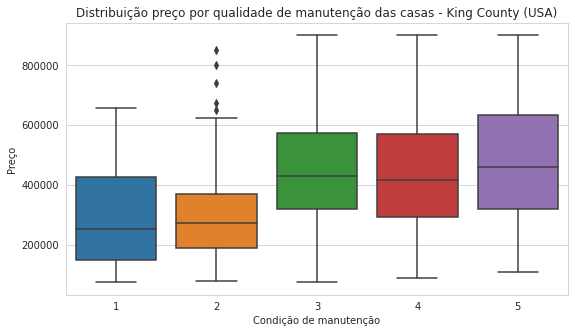

In [48]:
plt.figure(figsize=(9, 5))

sns.boxplot(data= casas_ate_900mil, x= 'condition', y= 'price');

#Texto eixo x
plt.xlabel('Condição de manutenção')

#Texto eixo y
plt.ylabel('Preço')

#Título
plt.title('Distribuição preço por qualidade de manutenção das casas - King County (USA)');

Podemos perceber, considerando somente as casas com valores até 900000 (novecentos mil) dólares, que as casas com valores mais altos se concentram nas categorias com melhor nível de manutenção.

#### Estude também a função `sns.barplot`.

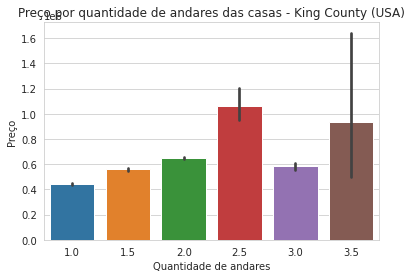

In [ ]:
# preço das casas pelo número de andares 

sns.barplot(data= dados2, x= 'floors', y= 'price');

#Texto eixo x
plt.xlabel('Quantidade de andares')

#Texto eixo y
plt.ylabel('Preço')

#Título
plt.title('Preço por quantidade de andares das casas - King County (USA)');

####A variável `waterfront` nos diz se a casa possui lago, rio, cachoeira ou praia próximo dela. 

0 == Não

1 == Sim

Qual a proporção de casas que atendem a essa características e as que não em nosso dataset?

In [ ]:
prop_waterfront = dados['waterfront'].value_counts(normalize= True) * 100

In [ ]:
print('Possui casas com lago, rio, cachoreira e/ou praia próximos?')
print(f'Não: {prop_waterfront[0]:.2f}%')
print(f'Sim: {prop_waterfront[1]:.2f}%')

Possui casas com lago, rio, cachoreira e/ou praia próximos?
Não: 99.25%
Sim: 0.75%


Gráfico de barras para visualizar tal diferença

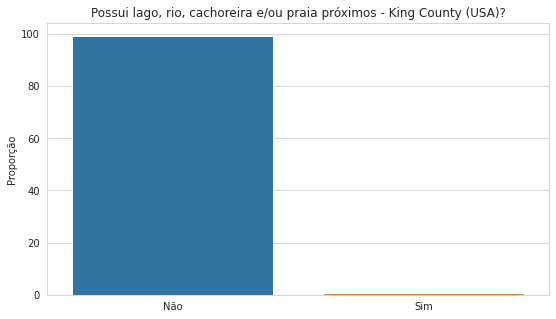

In [ ]:
plt.figure(figsize=(9, 5))

sns.barplot(x= prop_waterfront.index, y= prop_waterfront.values);

#Texto eixo x
plt.xticks([0, 1], ['Não', 'Sim'])

#Texto eixo y
plt.ylabel('Proporção')

#Título
plt.title('Possui lago, rio, cachoreira e/ou praia próximos - King County (USA)?');

O número de casas sem essa característica é largamente superior àquelas que possuem lago, rio, cachoeira e/ou praia pŕoximo delas. Isso nos leva a crer que seja uma característica da própria cidade.

#### Gráfico de barras: Plote um gráfico de barras para a relação entre o número de pavimentos `floors` e a área de moradia `sqft_living`.

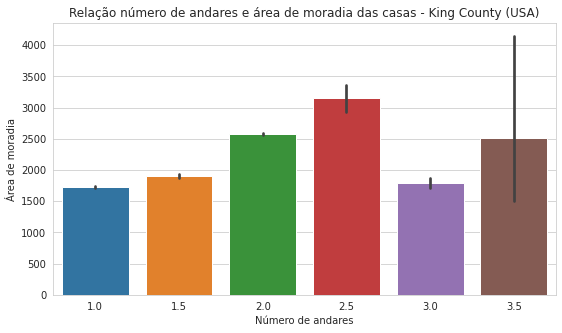

In [ ]:
plt.figure(figsize=(9, 5))

sns.barplot(data= dados2, x= 'floors', y= 'sqft_living');

#Texto eixo x
plt.xlabel('Número de andares')

#Texto eixo y
plt.ylabel('Área de moradia')

#Título
plt.title('Relação número de andares e área de moradia das casas - King County (USA)');